In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
from glob import glob
import IPython.display as ipd
import librosa.display

In [3]:
# Reading the normal audio files in an array.
data_dir = "0_dB_fan/fan/id_02/normal"
audio_files = glob(data_dir + '/*.wav')
x = len(audio_files)
x

1016

In [4]:
# Reading the abnormal audio files in an array.
data_dir1 = "0_dB_fan/fan/id_02/abnormal"
audio_files1 = glob(data_dir1 + '/*.wav')
y = len(audio_files1)
y

359

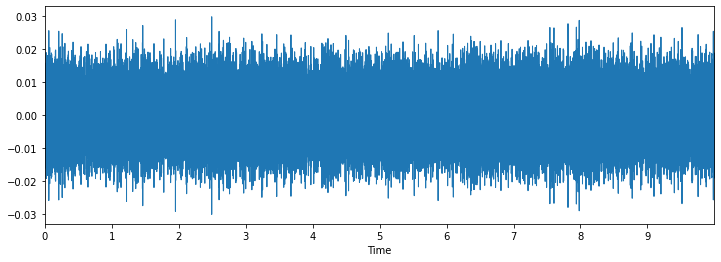

In [14]:
plt.figure(figsize = (12,4))
data, sample_rate = librosa.load(audio_files1[0])
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(audio_files[0])

In [6]:
sample_rate

22050

In [7]:
data

array([ 0.00195712,  0.00399682,  0.00276994, ..., -0.00452668,
       -0.00352689, -0.00149046], dtype=float32)

/home/arfa/anaconda3/envs/sound/lib/python3.8/site-packages/librosa/display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


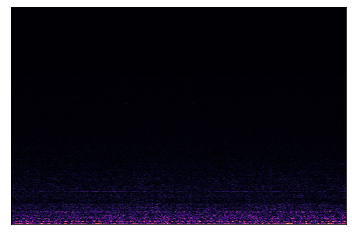

In [8]:
sgram = librosa.stft(data)
librosa.display.specshow(sgram)

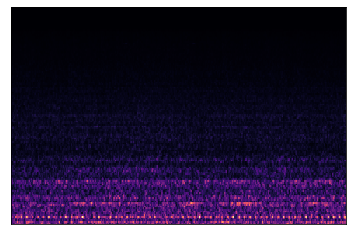

In [9]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

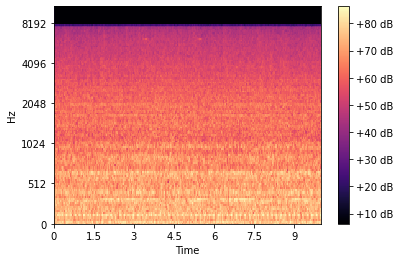

In [10]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [15]:
from scipy.io import wavfile as wav
wav_sample_rate, wave_audio = wav.read(audio_files1[0])

In [16]:
wave_audio

array([[ -16, -116, -348, ..., -338, -126,  -89],
       [-154, -209, -389, ..., -330, -164, -223],
       [-143, -275, -330, ..., -370, -336, -179],
       ...,
       [-578, -569, -660, ..., -300, -369, -528],
       [-620, -627, -616, ..., -250, -252, -486],
       [-520, -573, -561, ..., -347, -314, -425]], dtype=int16)

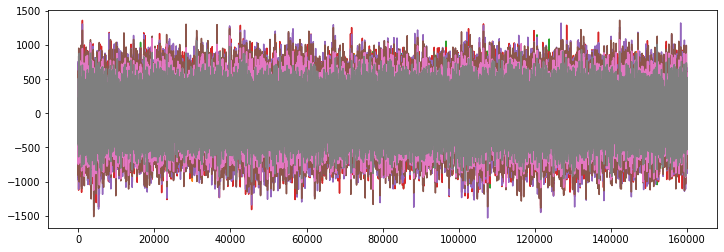

In [17]:
# original audio with 8 channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [57]:
# Mel-Frequency Cepstral coefficients
""" The MFCC summarises the frequency distribution accross
    the window size, so it is possible to analyse both the
    frequency and time characteristics of the sound.
    These audio respresentations will allow us to identify 
    features for classification.
"""
mfcc = librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc = 40)
print(mfcc.shape)

(40, 431)


In [96]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc = 30)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features


In [97]:
# Now we iterate through every audio file in normal folder and extract features
extracted_feature = []
for i in range(0, x):
    file_name = audio_files[i]
    class_label = 0 # 0 for normal.
    data = features_extractor(file_name)
    extracted_feature.append([data,class_label])

In [101]:
for i in range(0, y):
    file_name = audio_files1[i]
    class_label = 1 # 1 for abnormal.
    data = features_extractor(file_name)
    extracted_feature.append([data,class_label])

In [102]:
extracted_features_df = pd.DataFrame(extracted_feature,columns=['features','class'])
extracted_features_df.head()

,features,class
0,"[-388.70105, 149.88972, -63.50922, 84.213715, ...",0
1,"[-414.2212, 174.89838, -65.97293, 76.76898, -2...",0
2,"[-452.9884, 184.55492, -35.775677, 66.8286, -1...",0
3,"[-446.3728, 186.61082, -40.759796, 55.78397, -...",0
4,"[-423.04944, 184.01768, -47.73945, 66.740845, ...",0


In [103]:
extracted_features_df['class'].value_counts()

0    1011
1     407
Name: class, dtype: int64

In [104]:
X = np.array(extracted_features_df['features'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [105]:
X.shape

(1418, 30)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
#scale the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
# Import the model
from sklearn.linear_model import LogisticRegression
# Declare an instance of it
classifier = LogisticRegression()
# Fit the model
classifier.fit(X_train,y_train)
classifier.score(X_train,y_train)

0.9435626102292769

In [109]:
# Evaluate the model
classifier.score(X_test, y_test)

0.9225352112676056